Dataset link: https://www.kaggle.com/code/priyang/credit-card-fraud-detect-under-over-sampling/input

# IMPORT LIBRARIES

In [1]:
import pandas as pd

# IMPORT DATASET

In [2]:
data = pd.read_csv('creditcard.csv')

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
pd.options.display.max_columns = None

In [6]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
data.shape

(284807, 31)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# CHECK IF THERE'S ANY NULL DATA

In [9]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# FEATURE SCALING

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
sc = StandardScaler()
data['Amount'] = sc.fit_transform(pd.DataFrame(data['Amount']))

In [12]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


# DATA CLEANING

In [13]:
data = data.drop(['Time'],axis=1)

In [14]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [15]:
data.shape

(284807, 30)

In [16]:
data.duplicated().any()

True

In [17]:
data = data.drop_duplicates()

In [18]:
data.shape

(275663, 30)

In [19]:
284807 - 275663

9144

# HANDLING IMBALANCED DATA

In [20]:
data['Class'].value_counts()

0    275190
1       473
Name: Class, dtype: int64

In [21]:
import seaborn as sns

<Axes: xlabel='Class', ylabel='count'>

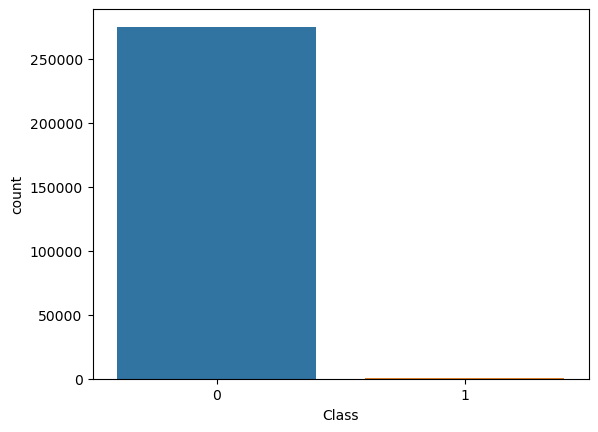

In [22]:
sns.countplot(x=data['Class'])

# STORE DEPENDENT AND INDEPENDENT VARIABLES

In [23]:
X = data.drop('Class',axis=1)
y = data['Class']

In [24]:
from sklearn.model_selection import train_test_split

# SPLIT THE DATASET INTO TRAINING AND TEST DATA

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=0)

# TRAIN THE DATA ON LOGISTIC REGRESSION MODEL 

In [26]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

# PREDICT THE DATA

In [27]:
y_pred1 = log.predict(X_test)

# CALCULATE ACCURACY, PRECISION, RECALL, F1SCORE FOR IMBALANCED DATA

In [28]:
from sklearn.metrics import accuracy_score

In [29]:
accuracy_score(y_pred1, y_test)

0.9991148644726914

In [30]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [31]:
precision_score(y_pred1,y_test)

0.5948275862068966

In [32]:
recall_score(y_pred1,y_test)

0.8313253012048193

In [33]:
f1_score(y_pred1,y_test)

0.6934673366834171

# HANDLING IMBLANCED DATA

#  (i) UnderSampling

In [34]:
normal = data[data['Class'] == 0]
fraud = data[data['Class'] == 1]

In [35]:
normal.shape

(275190, 30)

In [36]:
fraud.shape

(473, 30)

In [37]:
normal_sample = normal.sample(n=473)

In [38]:
normal_sample.shape

(473, 30)

In [39]:
new_dataset = pd.concat([normal_sample, fraud])

In [40]:
new_dataset.shape

(946, 30)

In [41]:
new_dataset['Class'].value_counts()

0    473
1    473
Name: Class, dtype: int64

In [42]:
new_dataset.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
63848,1.509322,-1.154583,0.798204,-1.307217,-1.958476,-0.839300,-1.354432,-0.061092,-1.387369,1.470228,-0.748856,-1.636981,-0.785788,-0.226431,0.989984,-0.086217,0.451881,0.474047,-0.430572,-0.419521,-0.080012,0.131488,0.021736,0.352344,0.296380,-0.098508,0.044045,0.023370,-0.328441,0
162783,-0.194448,0.753427,-1.046363,-1.214643,0.583129,-0.863471,0.885768,-0.110569,-1.471863,0.757584,-0.120522,0.170581,-0.199250,0.728642,-1.258683,-2.254169,-0.153261,1.677964,0.159589,-0.492039,-0.094599,0.484857,-0.210221,-0.490538,-0.444565,-0.178662,0.052952,-0.010717,-0.334318,0
3308,-0.956778,1.308722,1.715828,-0.037498,-0.094386,-1.061090,0.775904,-0.259698,-0.425047,-0.040536,0.079201,0.588031,1.010216,-0.133814,0.733860,-0.007565,-0.344036,-0.597392,-0.065578,0.107599,-0.133153,-0.419705,-0.018049,0.723685,-0.286524,0.006448,-0.096233,0.199134,-0.334998,0
247084,-1.401370,-0.254789,1.848722,-1.161003,0.506430,-0.130717,0.542026,0.197794,-0.289547,-1.074727,0.339835,0.719874,0.420144,-0.131485,-0.744799,0.934176,-1.170431,0.328825,-0.175861,0.364295,-0.073241,-0.657525,0.089486,-0.505162,0.358540,0.317397,-0.090731,0.059143,0.158526,0
76496,0.930004,-1.600221,0.736887,-0.537885,-1.721218,0.054840,-1.019585,0.064981,-0.085829,0.530453,-1.442868,-0.753463,0.123829,-0.285813,1.645811,-0.320690,-0.614388,2.015185,-0.928043,0.026523,-0.082851,-0.285041,-0.229309,-0.420620,-0.035950,1.144033,-0.051436,0.058903,0.629700,0


In [43]:
X = new_dataset.drop('Class',axis=1)
y = new_dataset['Class']

# SPLIT THE DATA, TRAIN THE DATA ON MODEL AND CALCULATE SCORES

In [44]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=0)

In [45]:
log.fit(X_train,y_train)

LogisticRegression()

In [46]:
y_pred1 = log.predict(X_test)

In [47]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred1, y_test)

0.9493670886075949

In [48]:
precision_score(y_pred1,y_test)

0.9310344827586207

In [49]:
recall_score(y_pred1,y_test)

0.9642857142857143

In [50]:
f1_score(y_pred1,y_test)

0.9473684210526316

# TRAINING THE DATA ON DECISION TREE MODEL

In [51]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()

In [52]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [53]:
y_pred2 = classifier.predict(X_test)

In [54]:
accuracy_score(y_test,y_pred2)

0.919831223628692

In [55]:
recall_score(y_test,y_pred2)


0.9224137931034483

In [56]:
f1_score(y_test,y_pred2)

0.9184549356223175

In [57]:
precision_score(y_test,y_pred2)

0.9145299145299145

# TRAINING THE DATA ON RANDOM FOREST MODEL

In [58]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()

In [59]:
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [60]:
y_pred3 = classifier.predict(X_test)

In [61]:
accuracy_score(y_test,y_pred3)

0.9493670886075949

In [62]:
recall_score(y_test,y_pred3)

0.9224137931034483

In [63]:
precision_score(y_test,y_pred3)

0.9727272727272728

In [64]:
f1_score(y_test,y_pred3)

0.9469026548672567

In [65]:
final_data = pd.DataFrame({'Models': ['LR', 'DT', 'RF'],
             'Accuracy':[accuracy_score(y_test,y_pred1)*100,
                        accuracy_score(y_test,y_pred2)*100,
                        accuracy_score(y_test,y_pred3)*100]})

In [66]:
final_data

,Models,Accuracy
0,LR,94.936709
1,DT,91.983122
2,RF,94.936709


# PLOT THE SCORES

<Axes: xlabel='Models', ylabel='Accuracy'>

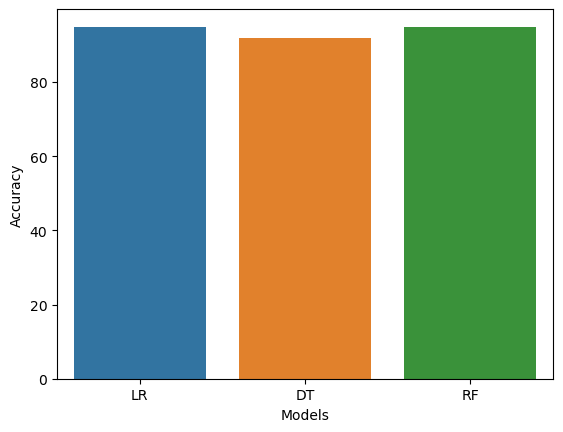

In [67]:
sns.barplot(x=final_data['Models'],y=final_data['Accuracy'])

In [68]:
X = data.drop('Class',axis=1)
y = data['Class']

In [69]:
X.shape

(275663, 29)

# (ii) OVERSAMPLING 

In [70]:
pip install imblearn

In [71]:
from imblearn.over_sampling import SMOTE

In [72]:
X_res, y_res = SMOTE().fit_resample(X, y)

In [73]:
y_res.value_counts()

0    275190
1    275190
Name: Class, dtype: int64

In [74]:
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.25, random_state=0)

In [75]:
log.fit(X_train, y_train)

LogisticRegression()

In [76]:
y_pred1 = log.predict(X_test)

In [77]:
accuracy_score(y_test,y_pred1)

0.945550347032959

In [78]:
recall_score(y_test,y_pred1)

0.9163067111175532

In [79]:
precision_score(y_test,y_pred1)

0.9735423660948039

In [80]:
f1_score(y_test, y_pred1)

0.944057823840387

In [81]:
classifier = DecisionTreeClassifier()

In [82]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [83]:
y_pred2  = classifier.predict(X_test)

In [84]:
accuracy_score(y_test,y_pred2)

0.9981976089247429

In [85]:
recall_score(y_test,y_pred1)

0.9163067111175532

In [86]:
precision_score(y_test,y_pred1)

0.9735423660948039

In [87]:
f1_score(y_test, y_pred1)

0.944057823840387

In [88]:
classifier = RandomForestClassifier()

In [89]:
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [90]:
y_pred3  = classifier.predict(X_test)

In [91]:
accuracy_score(y_test,y_pred2)

0.9981976089247429

In [92]:
recall_score(y_test,y_pred1)

0.9163067111175532

In [93]:
precision_score(y_test,y_pred1)

0.9735423660948039

In [94]:
f1_score(y_test, y_pred1)

0.944057823840387

In [95]:
final_data = pd.DataFrame({'Models': ['LR', 'DT', 'RF'],
             'Accuracy':[accuracy_score(y_test,y_pred1)*100,
                        accuracy_score(y_test,y_pred2)*100,
                        accuracy_score(y_test,y_pred3)*100]})

In [96]:
final_data

,Models,Accuracy
0,LR,94.555035
1,DT,99.819761
2,RF,99.990552


<Axes: xlabel='Models', ylabel='Accuracy'>

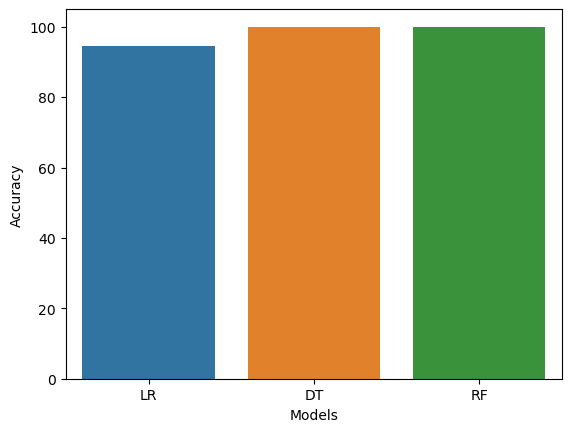

In [97]:
sns.barplot(x=final_data['Models'],y=final_data['Accuracy'])